# Task-4

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#### This used for the preprocessing of collected datset don't run this below code!!

In [4]:
# import os
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Set the path to the folder containing the CSV files
# folder_path = './Task 4 Datasets/Raw_Datasets'

# # Iterate over all files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
        
#         # Read the CSV file
#         df = pd.read_csv(file_path)
        
#         # Drop the first and last columns
#         df = df.iloc[:, 1:-1]
        
#         # Trim the rows from 300 to 799 (indexing starts from 0)
#         df = df.iloc[299:799]
        
#         # Save the modified DataFrame back to the same file or a new file
#         df.to_csv(os.path.join('./Task 4 Datasets/Trimed_Datasets', filename), index=False)

# print("Processing complete!")


In [5]:
import os
import pandas as pd
from sklearn.utils import shuffle


def Combining_Datasets(train_dir):
    # Activity mapping dictionary
    ACTIVITIES = {
        1: 'WALKING'            ,
        2: 'WALKING_UPSTAIRS'   ,
        3: 'WALKING_DOWNSTAIRS' ,
        4: 'SITTING'            ,
        5: 'STANDING'           ,
        6: 'LAYING'             ,
    }

    # Initialize empty DataFrames for X_train and y_train
    
    y_train = []
    X_train_combined = []
    for label in range(1,7):
        activity_folder = os.path.join(train_dir,ACTIVITIES[label])
        if os.path.exists(activity_folder):
        # Loop through each file in the activity folder
            for file in os.listdir(activity_folder):
                if file.endswith('.csv'):
                    # Read the CSV file
                    file_path = os.path.join(activity_folder, file)
                    df = pd.read_csv(file_path)
                    
                    # Combine the three columns into one using the formula column1^2 + column2^2 + column3^2
                    combined_column = df.iloc[:, 0]**2 + df.iloc[:, 1]**2 + df.iloc[:, 2]**2
                    
                    X_train_combined.append(combined_column)
                
                # Append the numeric label to y_train
                y_train.append(label)
        else:
            print(f"Directory not found: {activity_folder}")

    # Convert X_train_combined and y_train to DataFrames
    X_train_combined = pd.DataFrame(X_train_combined)
    y_train = pd.DataFrame(y_train)

    return X_train_combined,y_train



In [6]:
import joblib

def PreformanceDecisionTree(X_test,y_test,file):

    model = joblib.load(f'./Task_2 Models files/{file}')
    y_pred = model.predict(X_test)
    print(y_pred.shape)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    activity_mapping = {
        1: 'LAYING',
        2: 'SITTING',
        3: 'STANDING',
        4: 'WALKING',
        5: 'WALKING DOWNSTAIRS',
        6: 'WALKING UPSTAIRS'
    }
    

    conf_matrix = confusion_matrix(y_test, y_pred)

   

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## 4.1

Our test data is similar to Raw_accelero_meter data which is (126,500) so we have (18,500) we will test this on that model 

(18,)
Accuracy: 0.1667
Precision: 0.0556
Recall: 0.1667


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


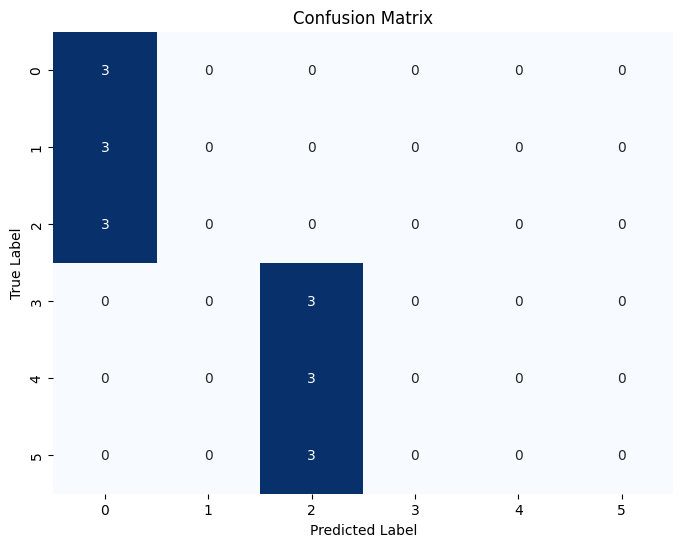

In [7]:
# Path to the Train directory
train_dir = os.path.abspath('Task 4 Datasets/4.1_Raw_Datasets/Train')
test_dir = os.path.abspath('Task 4 Datasets/4.1_Raw_Datasets/Test')
X_train_collected_data,y_train_collected_data = Combining_Datasets(train_dir)
X_test_collected_data, y_test_collected_data = Combining_Datasets(test_dir)

X_test_combined = pd.concat([X_train_collected_data, X_test_collected_data], ignore_index=True)
y_test_combined = pd.concat([y_train_collected_data, y_test_collected_data], ignore_index=True)
PreformanceDecisionTree(X_test_combined,y_test_combined,'DecisionTree_Raw_acc.pkl')

#### Using TSFEL for Prediction

*** Feature extraction started ***



*** Feature extraction finished ***
(18,)
Accuracy: 0.2222
Precision: 0.1111
Recall: 0.2222


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


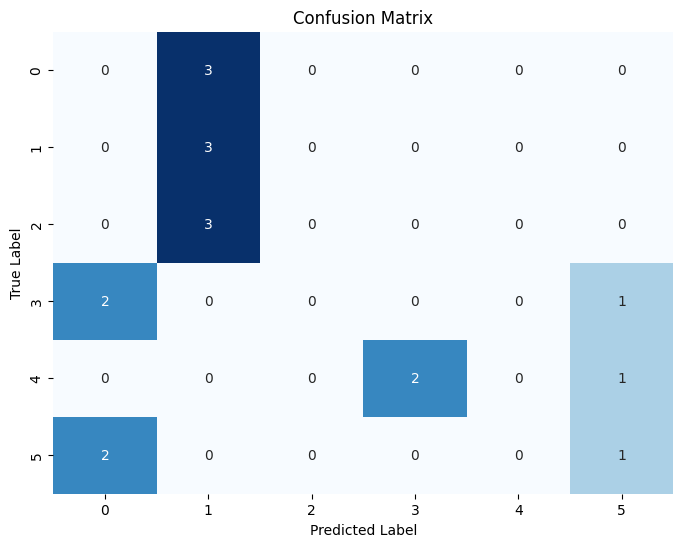

In [9]:
import tsfel

X_test_sig = list(X_test_combined.to_numpy())

cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_test_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_test_sig, fs = 100)

y_test_TSFEL = y_test_combined

PreformanceDecisionTree(X_test_TSFEL,y_test_TSFEL,'DecisionTree_TSFEL.pkl')


The model perfoemance is not as expected it has too low values of accuracy, precision and recall for both Raw Accelerometer and TSFEL models.

For Raw Accelerometer model:
Accuracy: 0.1667
Precision: 0.0556
Recall: 0.1667

For TSFEL model:
Accuracy: 0.2222
Precision: 0.1111
Recall: 0.2222

The Accuracy imporved for TSFEL.


## 4.2

We used Normalized data for this question and model we used the same raw_accelerometer_trained model (126,500) 

(18,)
Accuracy: 0.2222
Precision: 0.2519
Recall: 0.2222


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


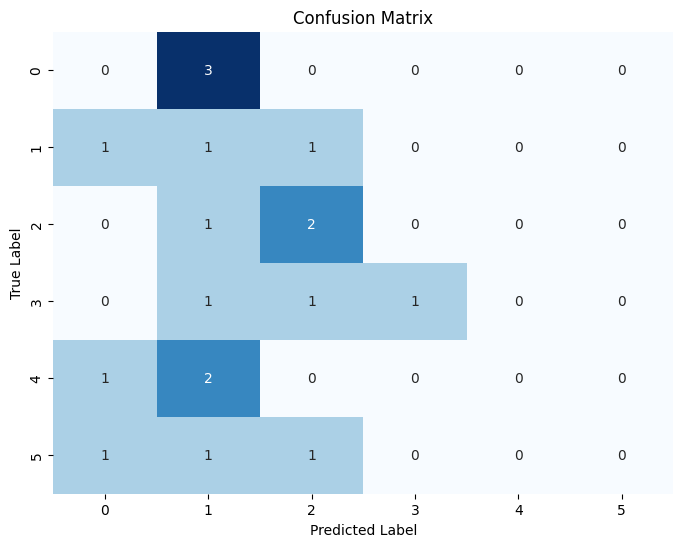

In [12]:

# Path to the Train directory
train_dir = os.path.abspath('Task 4 Datasets/4.2_Normalized_Datasets/Train')
test_dir = os.path.abspath('Task 4 Datasets/4.2_Normalized_Datasets/Test')
X_train_Normalized,y_train_Normalized = Combining_Datasets(train_dir)
X_test_Normalized, y_test_Normalized = Combining_Datasets(test_dir)

X_test_combined = pd.concat([X_train_Normalized, X_test_Normalized], ignore_index=True)
y_test_combined = pd.concat([y_train_Normalized, y_test_Normalized], ignore_index=True)
PreformanceDecisionTree(X_test_combined,y_test_combined,'DecisionTree_Raw_acc.pkl')


*** Feature extraction started ***



*** Feature extraction finished ***
(18,)
Accuracy: 0.1667
Precision: 0.0294
Recall: 0.1667


c:\Users\Shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


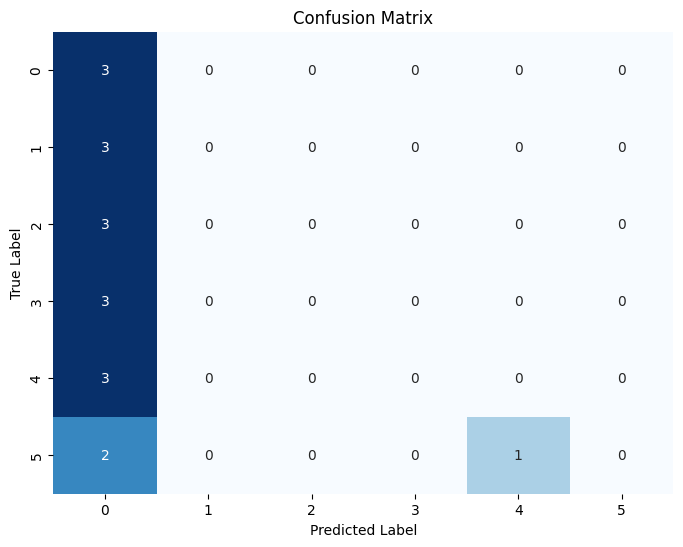

In [13]:
import tsfel

X_test_sig = list(X_test_combined.to_numpy())

cfg_file = tsfel.get_features_by_domain()  # All features
# Get features
X_test_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_test_sig, fs = 100)

y_test_TSFEL = y_test_combined

PreformanceDecisionTree(X_test_TSFEL,y_test_TSFEL,'DecisionTree_TSFEL.pkl')

Compared to the previous Raw accelerometer model this normalized accelerometer data is perfoem better with results:

Accuracy: 0.2222
Precision: 0.2519
Recall: 0.2222

But TSFEL decilned in the performance!

## Q3

In [ ]:
import numpy as np

# Define the arrays
Y_test_collected = np.array([1, 2, 3, 4, 5, 6])
Y_train_collected = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

# Save the arrays as .npy files
np.save('Y_test_collected.npy', Y_test_collected)
np.save('Y_train_collected.npy', Y_train_collected)

# Verify the shapes
print("Shape of Y_test_collected:", Y_test_collected.shape)
print("Shape of Y_train_collected:", Y_train_collected.shape)
print("The arrays have been saved to Y_test_collected.npy and Y_train_collected.npy")


In [1]:
%pip install langchain_groq

Note: you may need to restart the kernel to use updated packages.


In [ ]:
api_key = "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"

In [ ]:
import numpy as np
import random
from langchain_groq.chat_models import ChatGroq
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import re
import matplotlib.pyplot as plt

# Load data
x_test_path = '/content/X_test_collected.npy'
y_test_path = '/content/Y_test_collected.npy'
x_train_path = '/content/X_train.npy'
y_train_path = '/content/y_train.npy'
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)

# Label mappings
label_mapping = {
    "LAYING": 1,
    "SITTING": 2,
    "STANDING": 3,
    "WALKING": 4,
    "WALKING_DOWNWARDS": 5,
    "WALKING_UPWARDS": 6
}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Function to format a single example for few-shot learning
def format_example(example):
    ax = example[:, 0][:5]  # Increase data points used (5 for more context)
    ay = example[:, 1][:5]
    az = example[:, 2][:5]

    formatted_string = (
        f"ax: {ax}\n"
        f"ay: {ay}\n"
        f"az: {az}\n"
        f"Activity: "
    )

    return formatted_string

# Prepare few-shot examples with 4 examples per label
few_shot_examples = []
few_shot_labels = []

for label_name, label_id in label_mapping.items():
    # Filter examples by label
    label_indices = np.where(y_train == label_id)[0]
    selected_indices = random.sample(list(label_indices), 4)  # 4 random examples

    for idx in selected_indices:
        example = x_train[idx]
        indices = np.random.choice(example.shape[0], 5, replace=False)  # 5 data points
        few_shot_examples.append(example[indices])
        few_shot_labels.append(label_id)

# Format the few-shot examples with their labels
few_shot_prompts = [f"{format_example(ex)} {reverse_label_mapping[label_id]}" for ex, label_id in zip(few_shot_examples, few_shot_labels)]

# Format input examples from x_test
formatted_examples = [format_example(example) for example in x_test]

# Combine few-shot prompts with each test example for prediction
def create_few_shot_prompt(test_example):
    few_shot_section = "\n\n".join(few_shot_prompts)
    return f"{few_shot_section}\n\n{test_example}"

# Initialize the model with the correct model ID
model_name = "llama-3.1-8b-instant"
model = ChatGroq(model_name=model_name, api_key=api_key)

# Perform predictions using the ChatGroq model
def predict_with_groq(formatted_examples, limit=6):
    y_pred = []
    for i in range(0, len(formatted_examples), limit):
        batch_examples = formatted_examples[i:i+limit]
        for example in batch_examples:
            # Call the model to get a prediction
            response = model.predict(create_few_shot_prompt(example))
            y_pred.append(response)
    return y_pred

# Get predictions for all test examples using the ChatGroq model
y_pred = predict_with_groq(formatted_examples, limit=6)

# Extract activity labels from the model's response
def extract_label(response):
    match = re.search(r'\b(LAYING|SITTING|STANDING|WALKING|WALKING_DOWNWARDS|WALKING_UPWARDS)\b', response.upper())
    return match.group(0) if match else "UNKNOWN"

# Convert predictions to numeric labels
y_pred_labels = [label_mapping.get(extract_label(pred), 0) for pred in y_pred]

# Print the numeric predictions for all samples
print("All predicted labels:")
print(y_pred_labels)

print("All True labels:")
print(y_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy}")


## Q4

In [ ]:
import numpy as np
import random
from langchain_groq.chat_models import ChatGroq
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import re
import matplotlib.pyplot as plt

# Load data
x_test_path = '/content/X_test_collected.npy'
y_test_path = '/content/Y_test_collected.npy'
x_train_path = '/content/X_train_collected.npy'
y_train_path = '/content/Y_train_collected.npy'
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)

# Label mappings
label_mapping = {
    "LAYING": 1,
    "SITTING": 2,
    "STANDING": 3,
    "WALKING": 4,
    "WALKING_DOWNWARDS": 5,
    "WALKING_UPWARDS": 6
}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Function to format a single example for few-shot learning
def format_example(example):
    ax = example[:, 0][:5]  # Increase data points used (5 for more context)
    ay = example[:, 1][:5]
    az = example[:, 2][:5]

    formatted_string = (
        f"ax: {ax}\n"
        f"ay: {ay}\n"
        f"az: {az}\n"
        f"Activity: "
    )

    return formatted_string

# Prepare few-shot examples with up to 2 examples per label
few_shot_examples = []
few_shot_labels = []

for label_name, label_id in label_mapping.items():
    # Filter examples by label
    label_indices = np.where(y_train == label_id)[0]

    # Adjust the sample size based on available examples
    num_examples = min(2, len(label_indices))

    if num_examples > 0:
        selected_indices = random.sample(list(label_indices), num_examples)

        for idx in selected_indices:
            example = x_train[idx]
            indices = np.random.choice(example.shape[0], 5, replace=False)  # 5 data points
            few_shot_examples.append(example[indices])
            few_shot_labels.append(label_id)

# Format the few-shot examples with their labels
few_shot_prompts = [f"{format_example(ex)} {reverse_label_mapping[label_id]}" for ex, label_id in zip(few_shot_examples, few_shot_labels)]

# Format input examples from x_test
formatted_examples = [format_example(example) for example in x_test]

# Combine few-shot prompts with each test example for prediction
def create_few_shot_prompt(test_example):
    few_shot_section = "\n\n".join(few_shot_prompts)
    return f"{few_shot_section}\n\n{test_example}"

# Initialize the model with the correct model ID
model_name = "llama-3.1-8b-instant"
model = ChatGroq(model_name=model_name, api_key=api_key)

# Perform predictions using the ChatGroq model
def predict_with_groq(formatted_examples, limit=6):
    y_pred = []
    for i in range(0, len(formatted_examples), limit):
        batch_examples = formatted_examples[i:i+limit]
        for example in batch_examples:
            # Call the model to get a prediction
            response = model.predict(create_few_shot_prompt(example))
            y_pred.append(response)
    return y_pred

# Get predictions for all test examples using the ChatGroq model
y_pred = predict_with_groq(formatted_examples, limit=6)

# Extract activity labels from the model's response
def extract_label(response):
    match = re.search(r'\b(LAYING|SITTING|STANDING|WALKING|WALKING_DOWNWARDS|WALKING_UPWARDS)\b', response.upper())
    return match.group(0) if match else "UNKNOWN"

# Convert predictions to numeric labels
y_pred_labels = [label_mapping.get(extract_label(pred), 0) for pred in y_pred]

# Print the numeric predictions for all samples
print("All predicted labels:")
print(y_pred_labels)

print("All True labels:")
print(y_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy: {accuracy}")
